# 🎥 Films 1884 to 2018: In-Depth Analysis 🎬
### by [Evan Marie Carr](http://www.EvanMarie.com)

## Table of Contents:
- [Data Cleanup](#data)
- [Preliminary Look at the Dataset](#preliminary)
- [Most Successful and Popular Genres Overall](#genres)
- [Most Successful and Popular Genres by Decade](#genre_decades)
- [Highest Rated Movies in the Most Popular Genres](#genre_highs)
- [Most Successful and Active Production Companies](#companies)
- [Overview of Production Countries](#country)
- [Overview of Film Success Based on Original Language](#language)
- [Correlation Between Success and Popularity and a Film's Runtime](#runtime)




#### Importing Libraries:
These are the libraries and Pandas default settings that I will use for this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from wordcloud import WordCloud
from IPython.display import display
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

#### Importing the data and parsing the release date column:

In [2]:
movies = pd.read_csv('movies.csv', parse_dates = ['release_date'])

<a id=’data’></a>

---

## ➣ Data Cleanup:

In [3]:
# Renaming columns for convenience
movies.columns = ['id', 'title', 'tagline', 'release', 'genres',
       'collection', 'language', 'budget',
       'revenue', 'production_companies', 'production_countries',
       'votes', 'average_rating', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director']

In [4]:
# Creating a column that shows the return on investment for films
# This way, we can compare the budget to revenue more appropriately

movies['investment_return'] = movies.revenue.div(movies.budget)

### → A Random Selection of 5 Films from the Database:

In [49]:
HTML(movies[['title', 'poster_path', 'release', 'director']].sample(5).to_html(escape = False))

## ➣ Creating [WordCloud](https://amueller.github.io/word_cloud/index.html) representations of most used words:

In [4]:
title = movies.title.dropna()
overview = movies.overview.dropna()
tagline = movies.tagline.dropna()

title_corpus = " ".join(title)
tagline_corpus = " ".join(tagline)
overview_corpus = " ".join(overview)

title_wordcloud = WordCloud(background_color="black",
height =750, width=1500,
max_words = 175).generate(title_corpus)
overview_wordcloud = title_wordcloud = WordCloud(background_color="black",
height =750, width=1500,
max_words = 175).generate(overview_corpus)
tagline_wordcloud = title_wordcloud = WordCloud(background_color="black",
height =750, width=1500,
max_words = 175).generate(tagline_corpus)

### WordCloud of text from film titles:

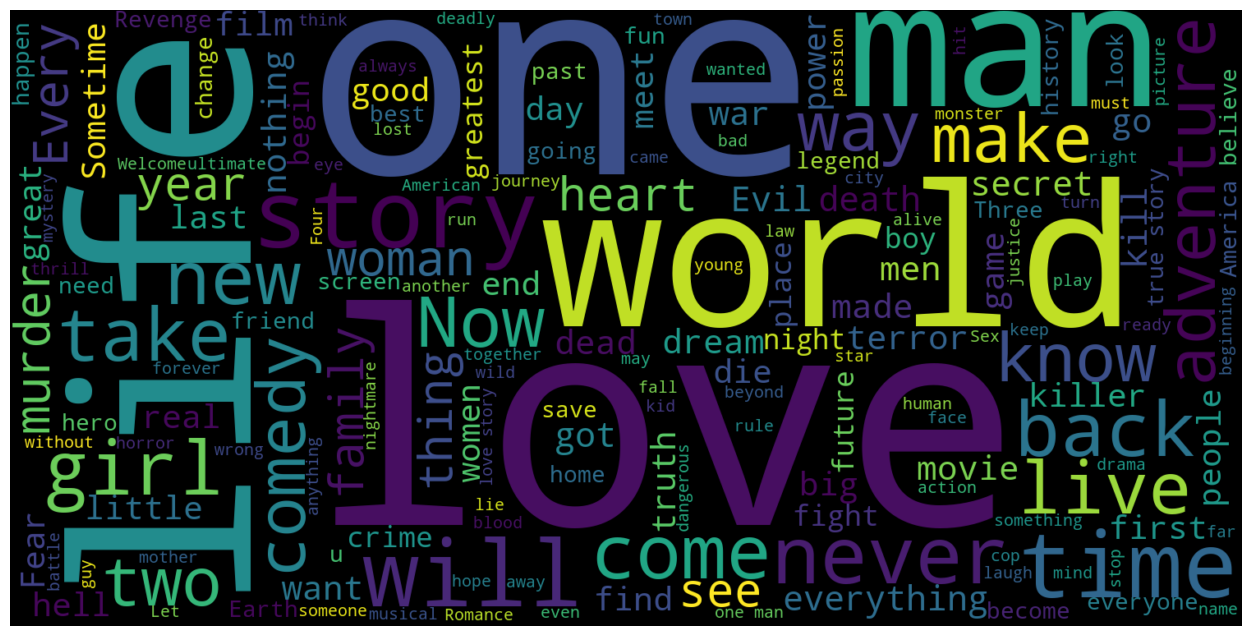

In [5]:
plt.figure(figsize = (16, 8))
plt.imshow(title_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### WordCloud of text from film taglines:

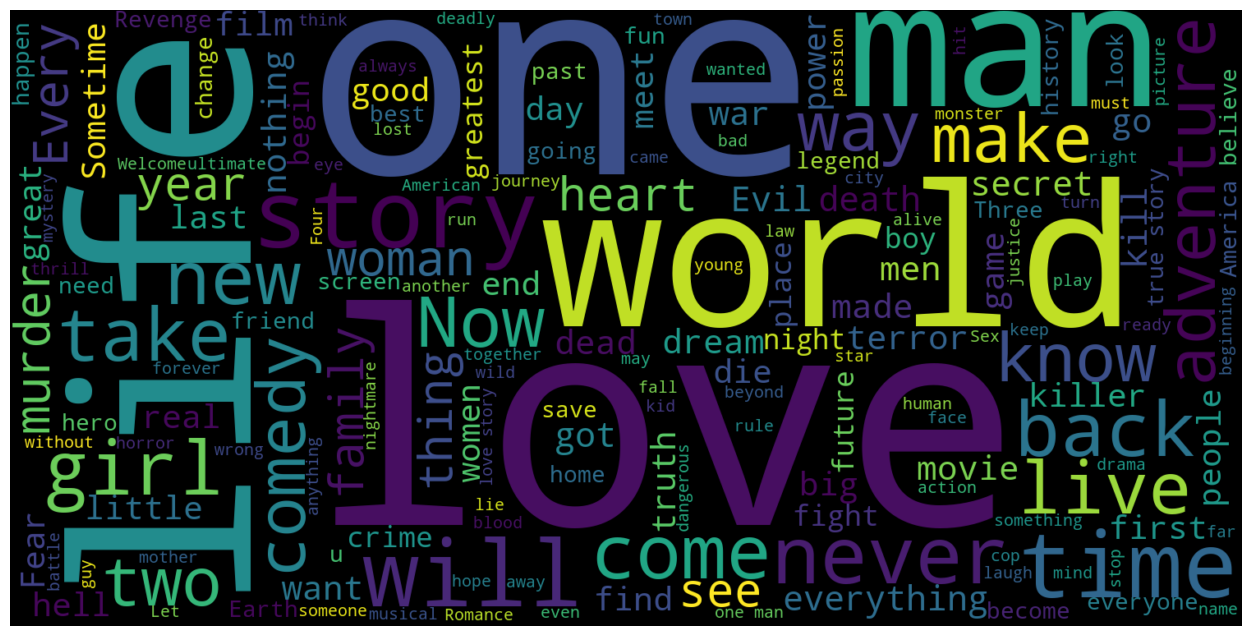

In [6]:
plt.figure(figsize = (16, 8))
plt.imshow(tagline_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### WordCloud of text from film overviews:

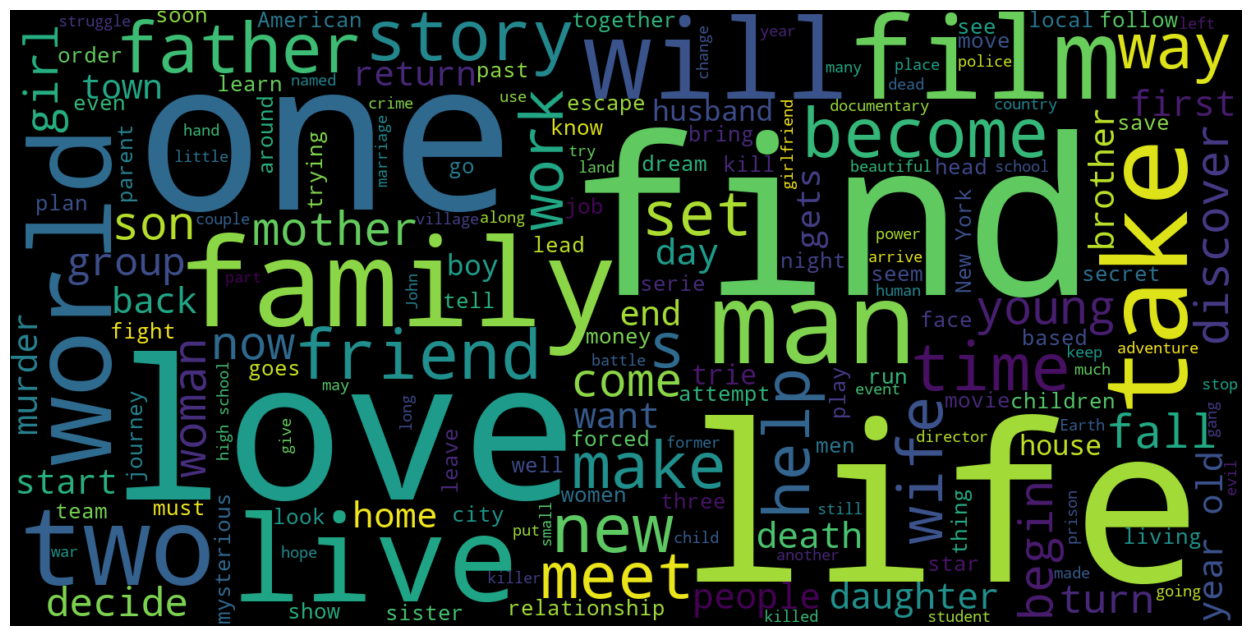

In [7]:
plt.figure(figsize = (16, 8))
plt.imshow(overview_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<a id=’genres’></a>

---

## ➣ Most Successful and Popular Genres Overall:

#### Creating a genre dataframe:

In [5]:
movies.set_index('id', inplace = True)

In [6]:
genres = movies.genres.str.split('|', expand = True)
genres = genres.stack().reset_index(level=1, drop=True).to_frame()
genres.columns = ['genre']
genres = genres.merge(movies[['title', 'poster_path', 'revenue', 'votes', 'average_rating', 'popularity', 'budget', 'release', 'investment_return']], how = 'left', left_index = True, right_index = True)

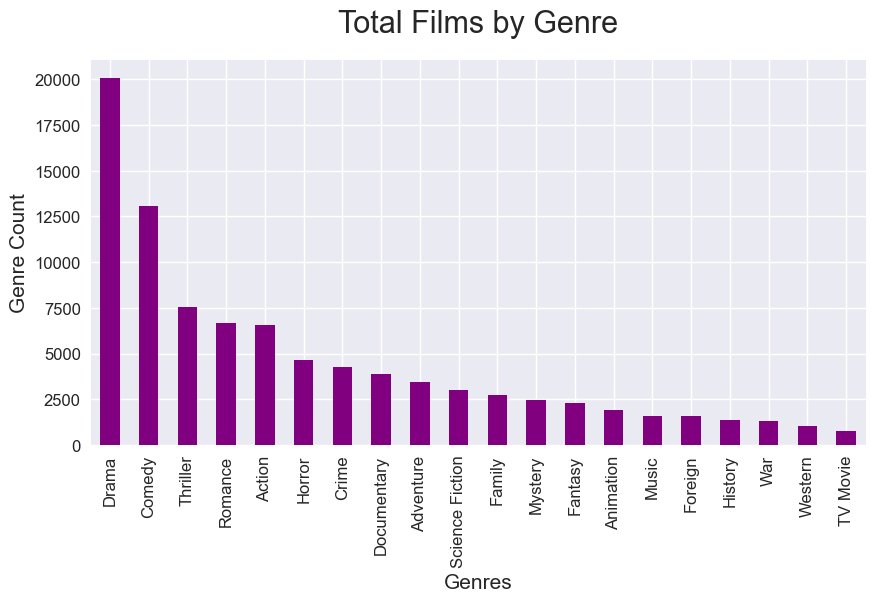

In [7]:
genre_counts = genres.genre.value_counts()
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_counts.plot(kind='bar', fontsize = 12, color = 'purple');
plt.title("Total Films by Genre", fontsize = 22, pad = 20);
plt.xlabel("Genres", fontsize = 15);
plt.ylabel('Genre Count', fontsize = 15);

#### Aggregating the data in the genre dataframe for further exploration:

In [18]:
genre_agg = genres.groupby('genre').agg(Total_Revenue = ('revenue', 'sum'),
                                        Mean_Revenue = ('revenue', 'mean'),
                                        Mean_Rating = ('average_rating', 'mean'),
                                        Mean_Popularity = ('popularity', 'mean'),
                                        Average_Investment_Return = ('investment_return', 'mean'))

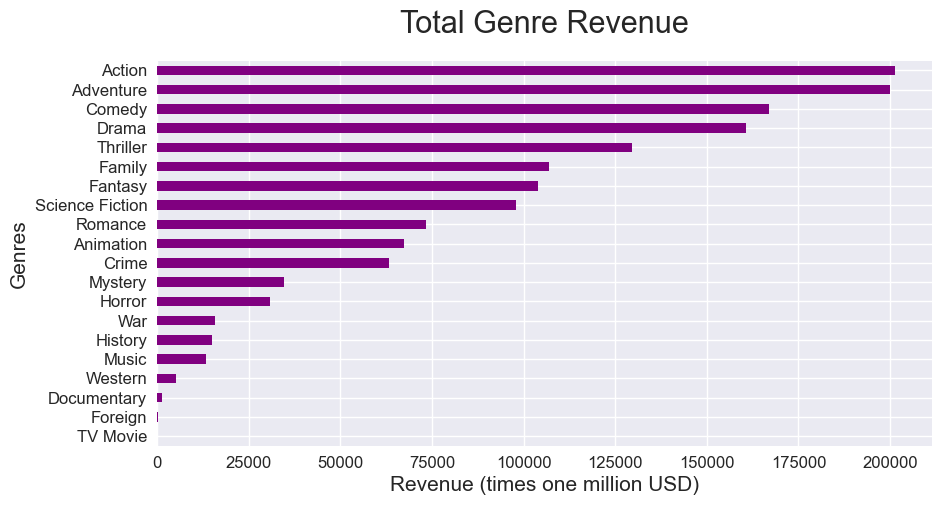

In [19]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_agg.Total_Revenue.sort_values(ascending = True).plot(kind='barh', fontsize = 12, color = 'purple');
plt.title("Total Genre Revenue", fontsize = 22, pad = 20);
plt.xlabel("Revenue (times one million USD)", fontsize = 15);
plt.ylabel('Genres', fontsize = 15);

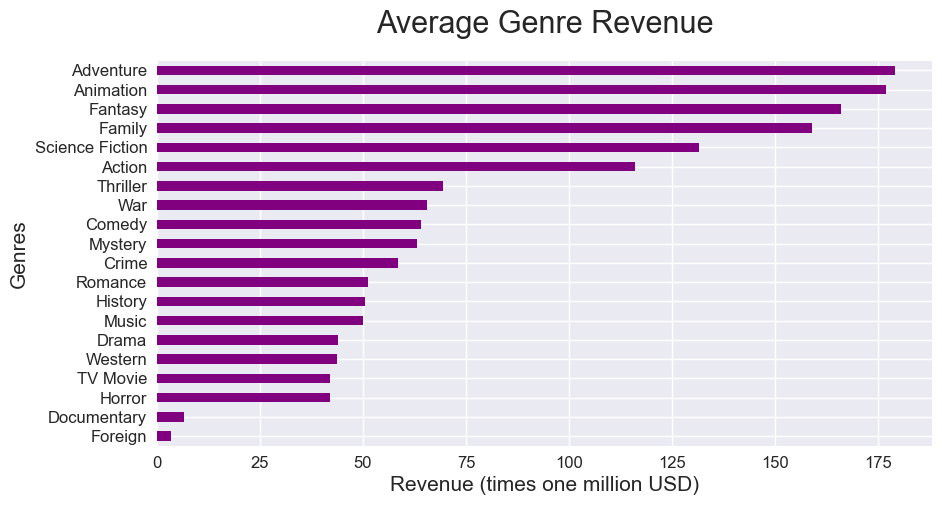

In [20]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_agg.Mean_Revenue.sort_values(ascending = True).plot(kind='barh', fontsize = 12, color = 'purple');
plt.title("Average Genre Revenue", fontsize = 22, pad = 20);
plt.xlabel("Revenue (times one million USD)", fontsize = 15);
plt.ylabel('Genres', fontsize = 15);

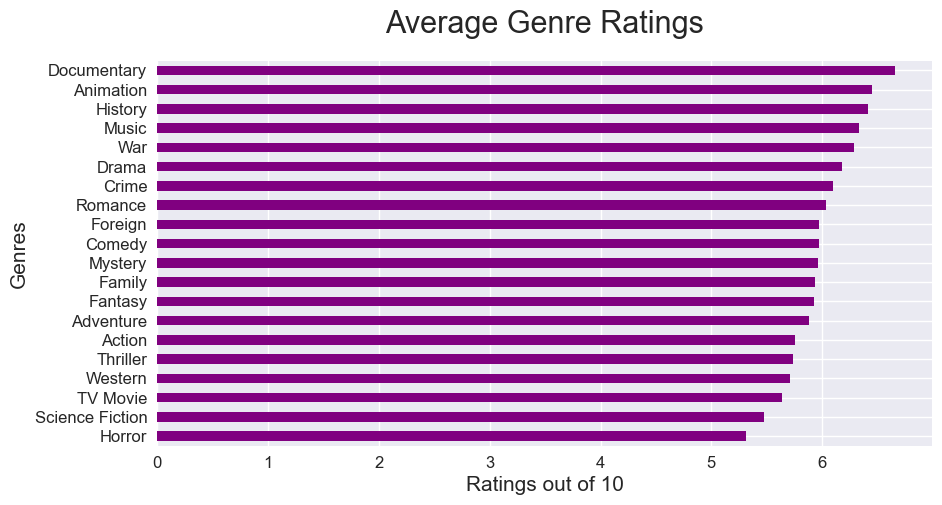

In [21]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_agg.Mean_Rating.sort_values(ascending = True).plot(kind='barh', fontsize = 12, color = 'purple');
plt.title("Average Genre Ratings", fontsize = 22, pad = 20);
plt.xlabel("Ratings out of 10", fontsize = 15);
plt.ylabel('Genres', fontsize = 15);

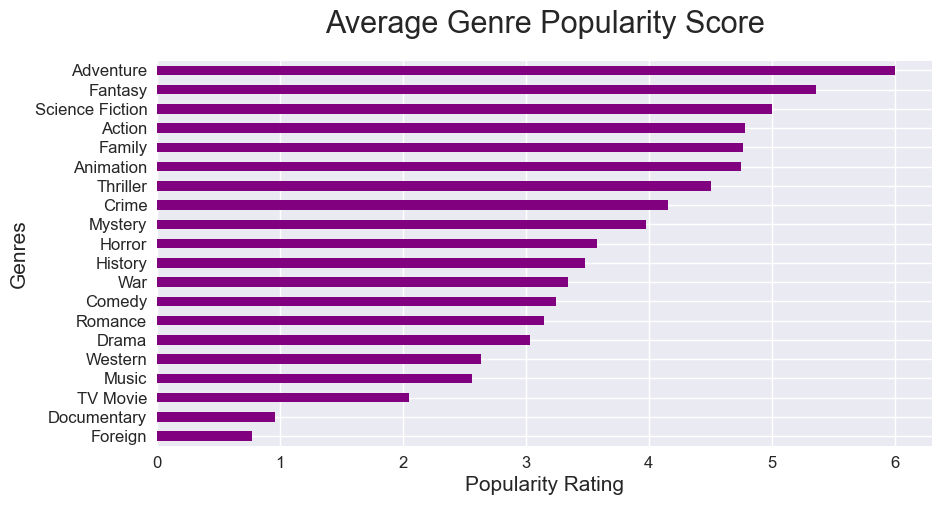

In [22]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_agg.Mean_Popularity.sort_values(ascending = True).plot(kind='barh', fontsize = 12, color = 'purple');
plt.title("Average Genre Popularity Score", fontsize = 22, pad = 20);
plt.xlabel("Popularity Rating", fontsize = 15);
plt.ylabel('Genres', fontsize = 15);

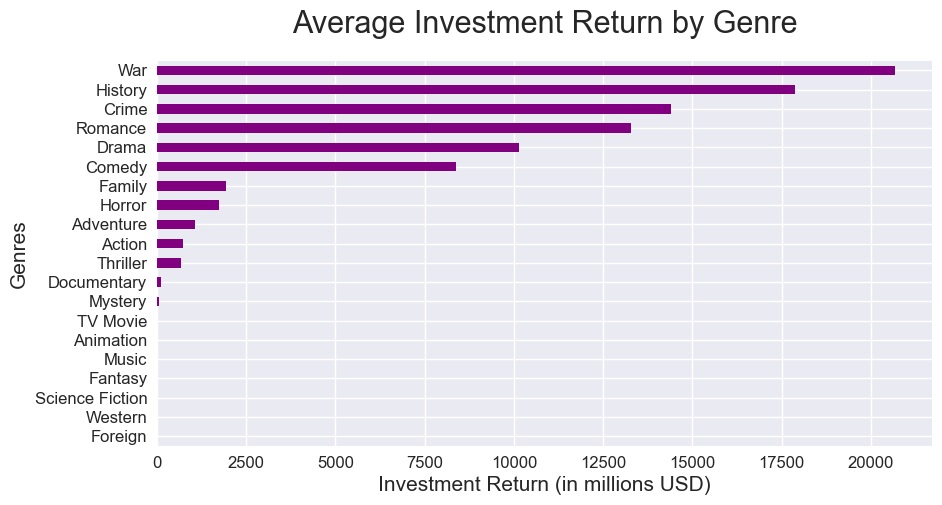

In [23]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genre_agg.Average_Investment_Return.sort_values(ascending = True).plot(kind='barh', fontsize = 12, color = 'purple');
plt.title("Average Investment Return by Genre", fontsize = 22, pad = 20);
plt.xlabel("Investment Return (in millions USD)", fontsize = 15);
plt.ylabel('Genres', fontsize = 15);

<a id=’genre_decades’></a>

---

## ➣ Most Successful and Popular Genres by Decade:

In [8]:
# Function to extract the year from the film's release date and create a decade field accordingly

def get_decade(df, datetime_col):
    df['decade'] = df[datetime_col].dt.year.apply(lambda x: str(x)[:3] + '0s')
    return df

In [9]:
# Using the above function to add the decade column to the genres dataframe

genres.reset_index()
genres = get_decade(genres, "release")

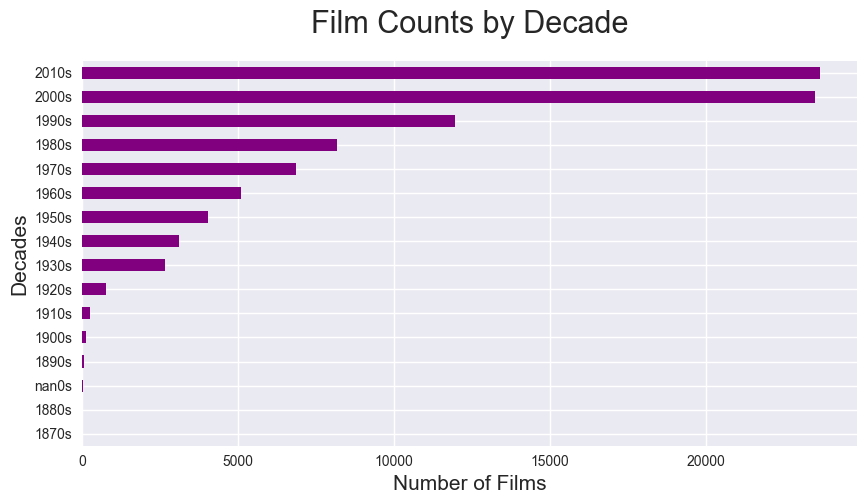

In [10]:
plt.style.use('seaborn-v0_8');
plt.figure(figsize=(10, 5));
genres.decade.value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'purple');
plt.title("Film Counts by Decade", fontsize = 22, pad = 20);
plt.xlabel("Number of Films", fontsize = 15);
plt.ylabel('Decades', fontsize = 15);

### Genre count:

In [11]:
genre_total = genres["genre"].nunique()
print(f'There are {genre_total} genres in the database.')

There are 20 genres in the database.


### Function for plotting genres and decade data:

In [12]:
def plot_genre_decade(decade, col, title, xlabel):
    plt.style.use('seaborn-v0_8');
    plt.figure(figsize=(10, 5));
    genres[genres.decade == decade].groupby(['genre', 
                                              'decade'])[col].mean().sort_values(ascending = True).plot(kind='barh', color = 'purple');
    plt.title(title, fontsize = 22, pad = 20);
    plt.xlabel(xlabel, fontsize = 15);
    plt.ylabel('Genres', fontsize = 15);

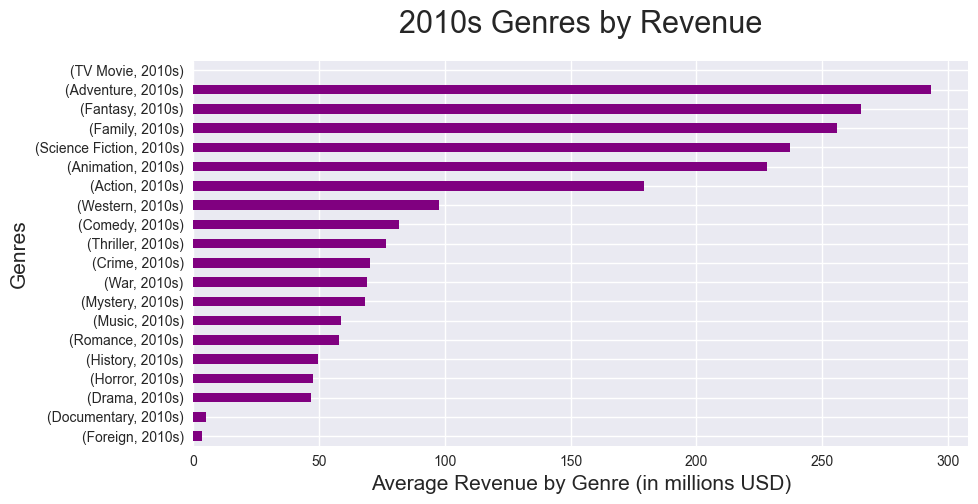

In [13]:
plot_genre_decade(decade='2010s', col = 'revenue', title = '2010s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

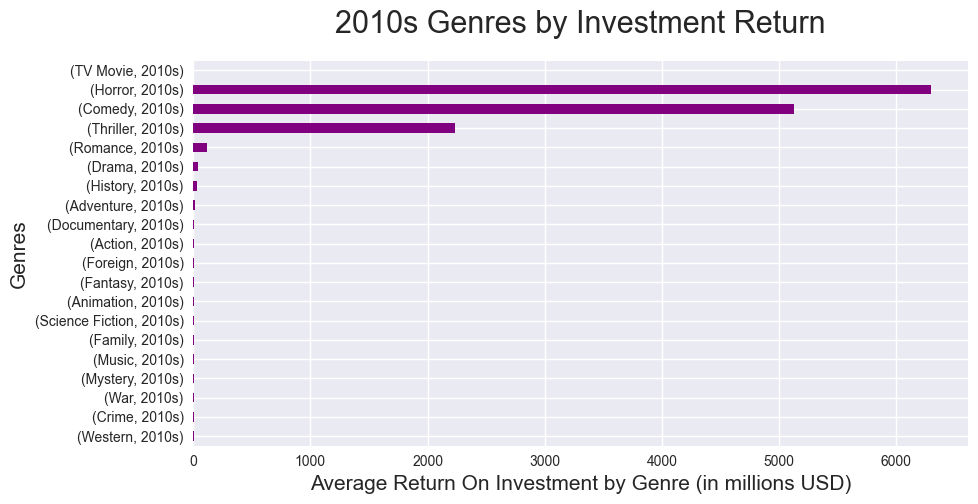

In [116]:
plot_genre_decade(decade='2010s', col = 'investment_return', title = '2010s Genres by Investment Return', 
                  xlabel = 'Average Return On Investment by Genre (in millions USD)')

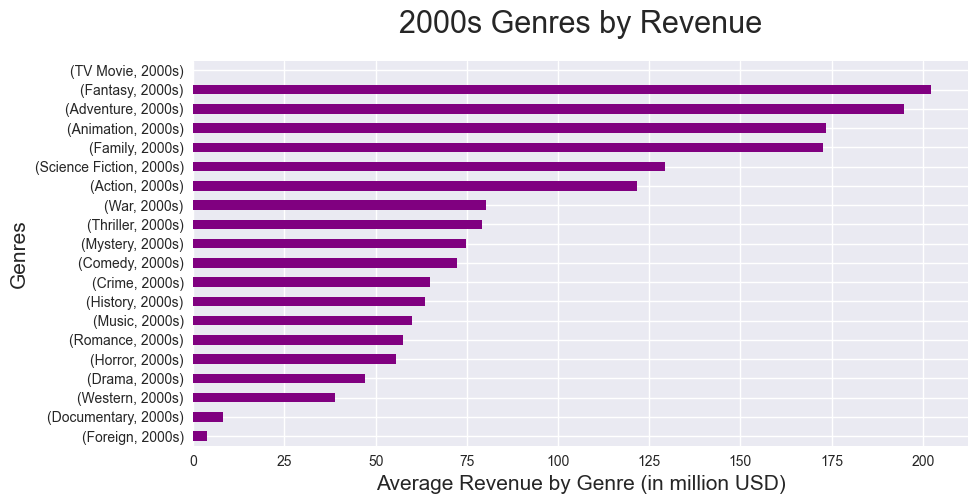

In [117]:
plot_genre_decade(decade='2000s', col = 'revenue', title = '2000s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in million USD)')

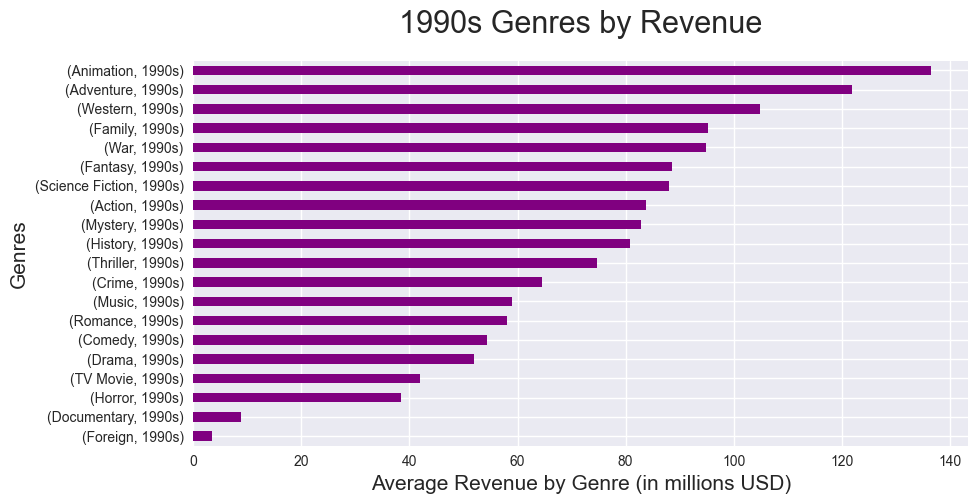

In [118]:
plot_genre_decade(decade='1990s', col = 'revenue', title = '1990s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

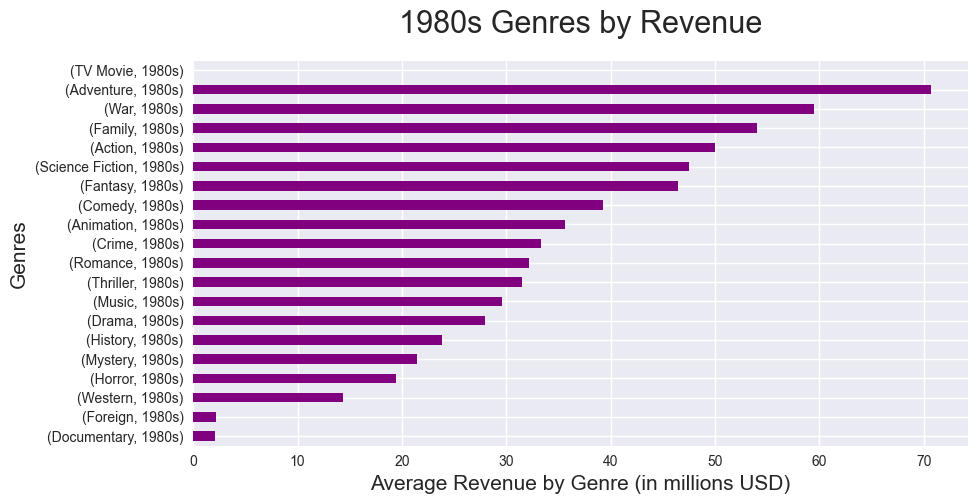

In [119]:
plot_genre_decade(decade='1980s', col = 'revenue', title = '1980s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

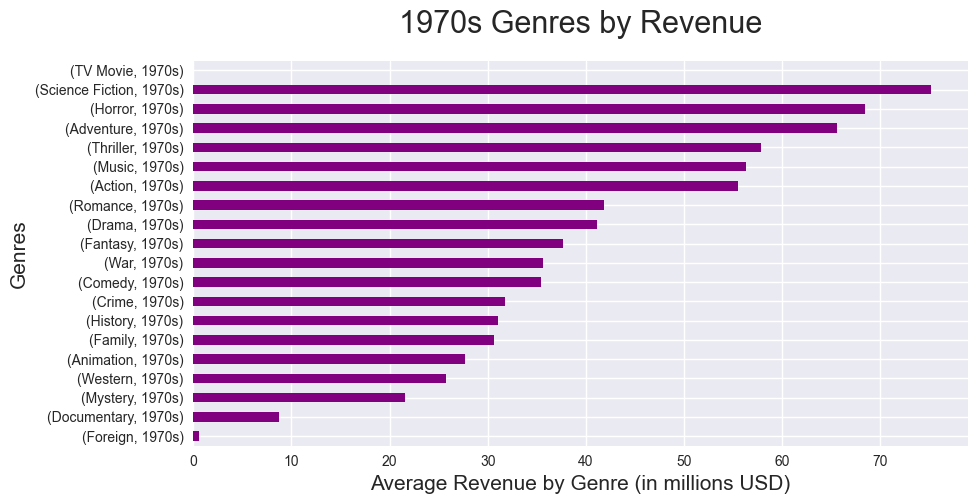

In [120]:
plot_genre_decade(decade='1970s', col = 'revenue', title = '1970s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

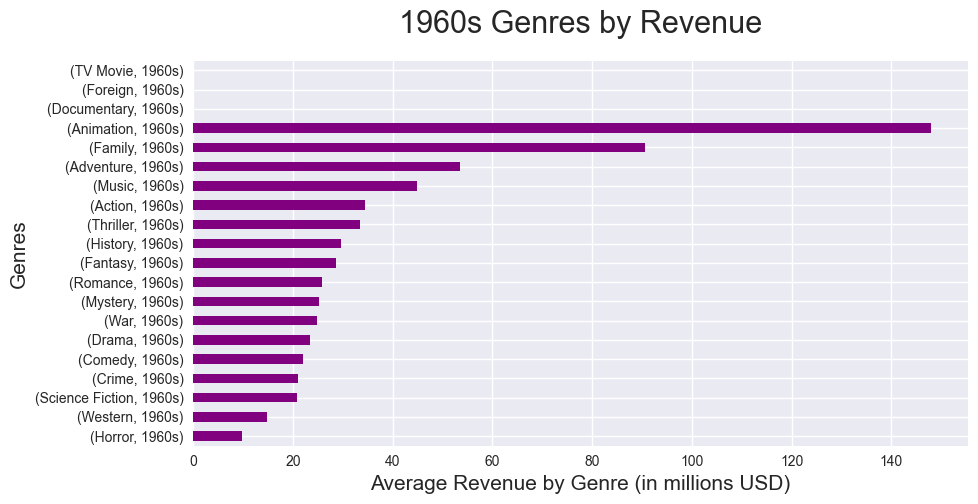

In [121]:
plot_genre_decade(decade='1960s', col = 'revenue', title = '1960s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

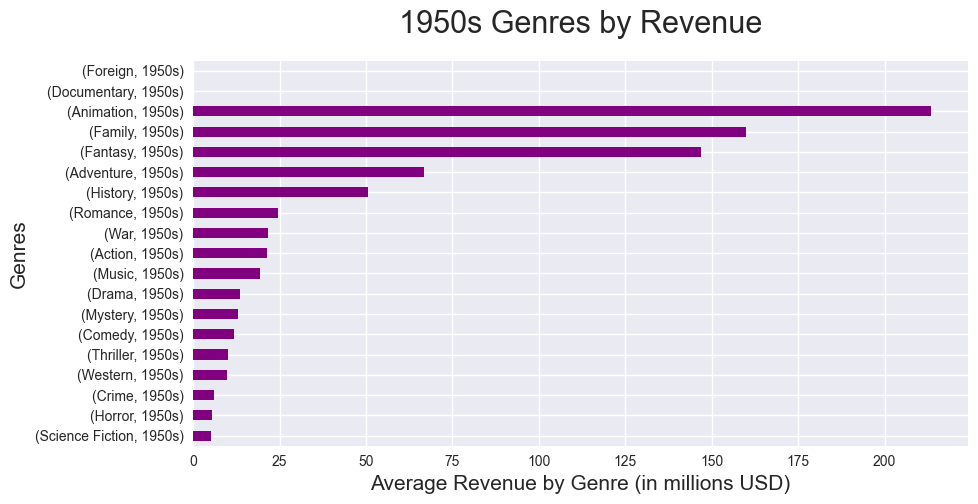

In [122]:
plot_genre_decade(decade='1950s', col = 'revenue', title = '1950s Genres by Revenue', 
                  xlabel = 'Average Revenue by Genre (in millions USD)')

<a id=’genre_highs’></a>

---

## ➣ Highest Rated Movies in the Most Popular Genres:

In [14]:
top_8_genres = genres.groupby('genre').popularity.mean().sort_values(ascending = False).nlargest(8).index
top_8_genres = list(top_8_genres)

In [15]:
def highest_rated_for_genre(df, genres_list):
    import warnings
    # warnings.simplefilter("ignore")
    results = pd.DataFrame(columns = ['title', 'poster_path', 'genre', 'average_rating'])
    for item in genres_list:
        genre_mask = genres.genre == item
        votes_mask = genres.votes >= 100
        current_results = genres.loc[genre_mask & votes_mask, ['title', 'poster_path', 'genre', 'average_rating']].nlargest(8, 'average_rating')
        print("......." * 10)
        print(f"Top Rated Films Overall for the {item.upper()} genre:")
        divider = pd.DataFrame(data = [["GENRE: " + item.upper(), " ", " ", " "]], columns = ['title', 'poster_path', 'genre', 'average_rating'])
        results = pd.concat([results, divider, current_results])
        display(current_results[['title', 'genre', 'average_rating']])
    warnings.filterwarnings('default')
    return results

## ⇨ Top Films for Top Genres (tabular):

In [42]:
highest_rated_by_genre = highest_rated_for_genre(genres, top_8_genres)

......................................................................
Top Rated Films Overall for the ADVENTURE genre:


title      genre  \
id                                                                
129                                    Spirited Away  Adventure   
128                                Princess Mononoke  Adventure   
1891                         The Empire Strikes Back  Adventure   
4935                            Howl's Moving Castle  Adventure   
40096                                   A Dog's Will  Adventure   
11                                         Star Wars  Adventure   
122    The Lord of the Rings: The Return of the King  Adventure   
27205                                      Inception  Adventure   

       average_rating  
id                     
129              8.30  
128              8.20  
1891             8.20  
4935             8.20  
40096            8.20  
11               8.10  
122              8.10  
27205            8.10

......................................................................
Top Rated Films Overall for the FANTASY genre:


title    genre  average_rating
id                                                                           
129                                    Spirited Away  Fantasy            8.30
128                                Princess Mononoke  Fantasy            8.20
497                                   The Green Mile  Fantasy            8.20
4935                            Howl's Moving Castle  Fantasy            8.20
122    The Lord of the Rings: The Return of the King  Fantasy            8.10
992                                    Sherlock, Jr.  Fantasy            8.10
10376                             The Legend of 1900  Fantasy            8.10
14696                                         Ugetsu  Fantasy            8.10

......................................................................
Top Rated Films Overall for the SCIENCE FICTION genre:


title            genre  average_rating
id                                                                    
374430  Black Mirror: White Christmas  Science Fiction            8.30
1891          The Empire Strikes Back  Science Fiction            8.20
11                          Star Wars  Science Fiction            8.10
18491           The End of Evangelion  Science Fiction            8.10
27205                       Inception  Science Fiction            8.10
157336                   Interstellar  Science Fiction            8.10
19                         Metropolis  Science Fiction            8.00
105                Back to the Future  Science Fiction            8.00

......................................................................
Top Rated Films Overall for the ACTION genre:


title   genre  average_rating
id                                                                           
155                                   The Dark Knight  Action            8.30
346                                     Seven Samurai  Action            8.20
1891                          The Empire Strikes Back  Action            8.20
14537                                        Harakiri  Action            8.20
331214                               Band of Brothers  Action            8.20
11                                          Star Wars  Action            8.10
122     The Lord of the Rings: The Return of the King  Action            8.10
27205                                       Inception  Action            8.10

......................................................................
Top Rated Films Overall for the FAMILY genre:


title   genre  average_rating
id                                                   
129             Spirited Away  Family            8.30
455661         In a Heartbeat  Family            8.30
399106                  Piper  Family            8.20
110416        Song of the Sea  Family            8.10
105        Back to the Future  Family            8.00
1585    It's a Wonderful Life  Family            8.00
8392       My Neighbor Totoro  Family            8.00
8587            The Lion King  Family            8.00

......................................................................
Top Rated Films Overall for the ANIMATION genre:


title      genre  average_rating
id                                                       
372058              Your Name.  Animation            8.50
129              Spirited Away  Animation            8.30
455661          In a Heartbeat  Animation            8.30
128          Princess Mononoke  Animation            8.20
4935      Howl's Moving Castle  Animation            8.20
12477   Grave of the Fireflies  Animation            8.20
399106                   Piper  Animation            8.20
18491    The End of Evangelion  Animation            8.10

......................................................................
Top Rated Films Overall for the THRILLER genre:


title     genre  average_rating
id                                                             
155                   The Dark Knight  Thriller            8.30
539                            Psycho  Thriller            8.30
680                      Pulp Fiction  Thriller            8.30
374430  Black Mirror: White Christmas  Thriller            8.30
101            Leon: The Professional  Thriller            8.20
567                       Rear Window  Thriller            8.20
12493                    High and Low  Thriller            8.20
77                            Memento  Thriller            8.10

......................................................................
Top Rated Films Overall for the CRIME genre:


title  genre  average_rating
id                                                                            
238                                       The Godfather  Crime            8.50
278                            The Shawshank Redemption  Crime            8.50
15584  Dear Zachary: A Letter to a Son About His Father  Crime            8.40
155                                     The Dark Knight  Crime            8.30
240                              The Godfather: Part II  Crime            8.30
311                         Once Upon a Time in America  Crime            8.30
680                                        Pulp Fiction  Crime            8.30
101                              Leon: The Professional  Crime            8.20

## ⇨ Top Films for Top Genres with Posters:

In [43]:
HTML(highest_rated_by_genre.to_html(escape = False))

<a id=’companies’></a>

---

## ➣ Most Successful and Active Production Companies:

#### Creating a production companies dataframe:

In [16]:
production = movies.production_companies.str.split('|', expand = True)
production = production.stack().reset_index(level = 1, drop = True).to_frame()
production.columns = ['production_company']
production = production.merge(movies[['title', 'poster_path', 'revenue', 'production_countries', 'votes', 'average_rating', 'popularity', 'budget', 'release', 'investment_return']], how = 'left', left_index = True, right_index = True)

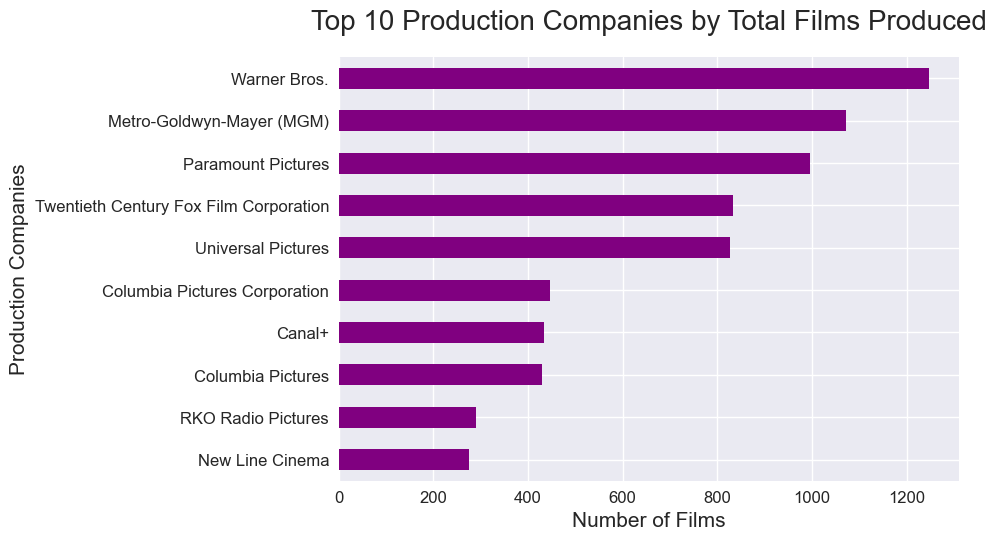

In [17]:
most_active_production = production.production_company.value_counts().head(10)
most_active_production.sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Total Films Produced", size = 20, pad = 20);
plt.xlabel('Number of Films', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

### Aggregating the Production Company Dataframe:

In [32]:
production_agg = production.groupby('production_company').agg(Total_Revenue = ('revenue', 'sum'),
                                                                Mean_Revenue = ('revenue', 'mean'),
                                                                Average_Vote_Counts = ('votes', 'mean'),
                                                                Mean_Rating = ('average_rating', 'mean'),
                                                                Mean_Popularity = ('popularity', 'mean'),
                                                                Average_Investment_Return = ('investment_return', 'mean'))

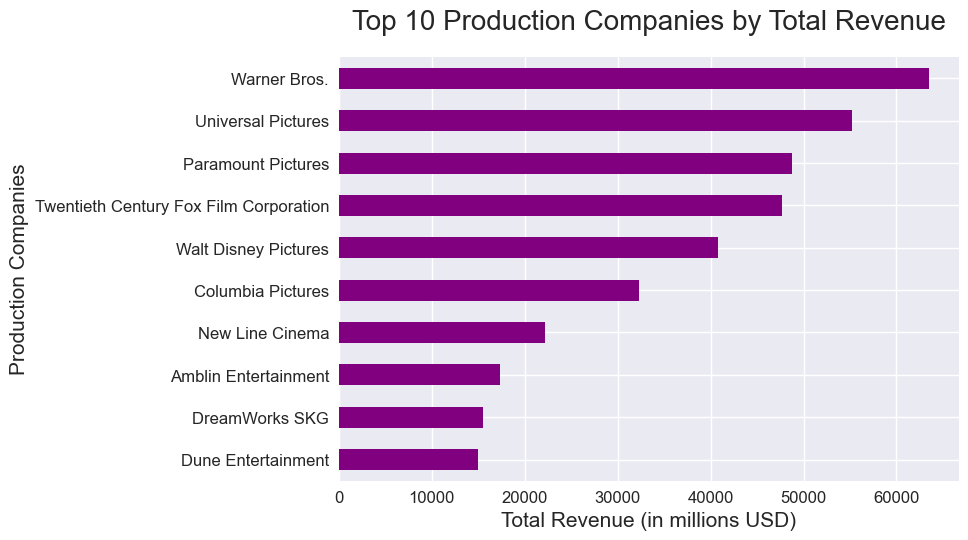

In [33]:
production_agg.Total_Revenue.nlargest(10).sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Total Revenue", size = 20, pad = 20);
plt.xlabel('Total Revenue (in millions USD)', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

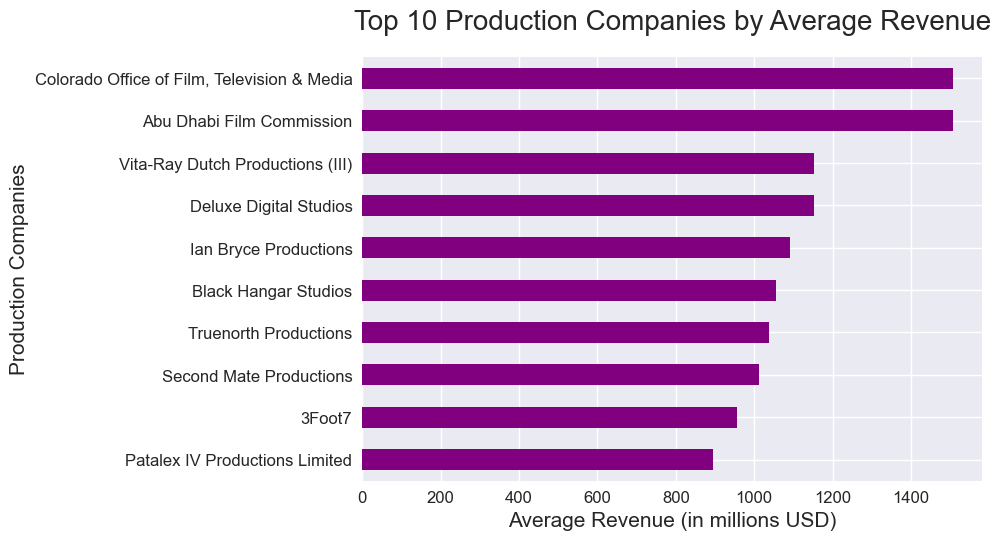

In [34]:
production_agg.Mean_Revenue.nlargest(10).sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Average Revenue", size = 20, pad = 20);
plt.xlabel('Average Revenue (in millions USD)', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

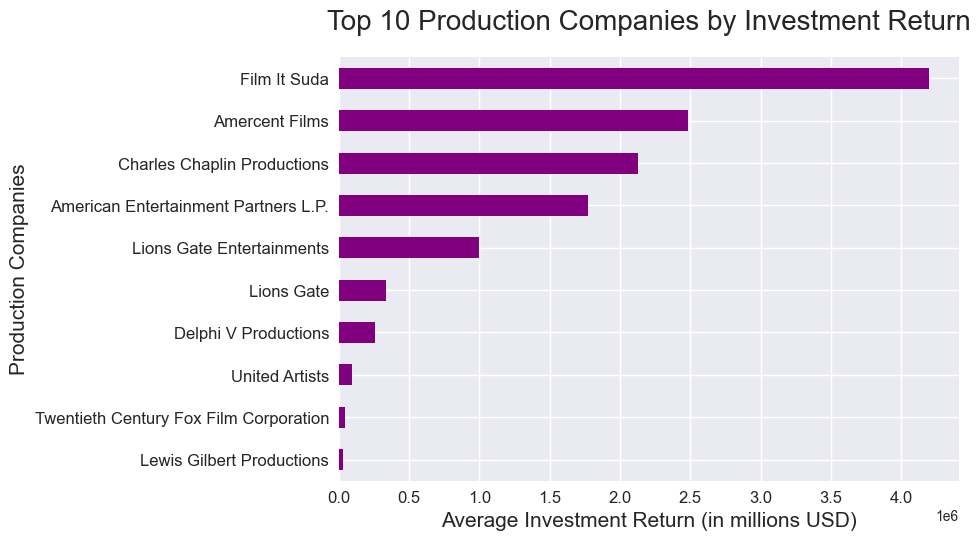

In [35]:
production_agg.Average_Investment_Return.nlargest(10).sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Investment Return", size = 20, pad = 20);
plt.xlabel('Average Investment Return (in millions USD)', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

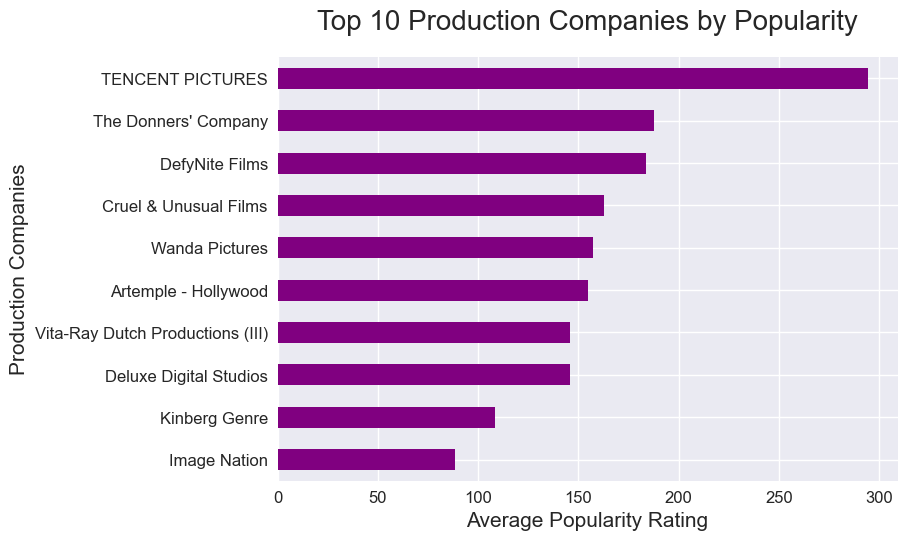

In [36]:
production_agg.Mean_Popularity.nlargest(10).sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Popularity", size = 20, pad = 20);
plt.xlabel('Average Popularity Rating', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

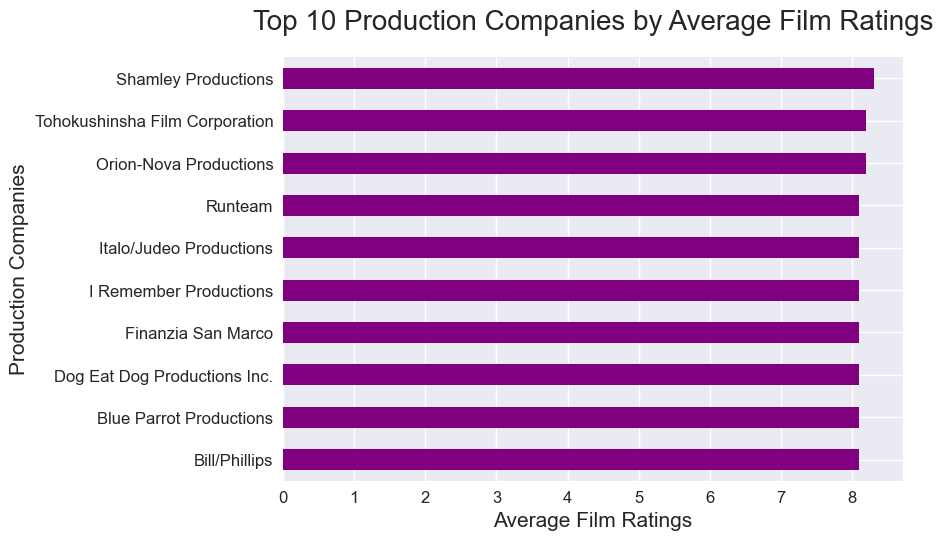

In [52]:
production_agg[production_agg.Average_Vote_Counts >= 1000].Mean_Rating.nlargest(10).sort_values().plot(kind = 'barh', fontsize = 12, color = 'purple');
plt.title("Top 10 Production Companies by Average Film Ratings", size = 20, pad = 20);
plt.xlabel('Average Film Ratings', fontsize = 15);
plt.ylabel('Production Companies', fontsize = 15);

<a id=’country’></a>

---

## ➣ Overview of Production Countries:

In [41]:
production_countries = movies.production_countries.str.split('|', expand = True)
production_countries = production_countries.stack().reset_index(level = 1, drop = True).to_frame()
production_countries.columns = ['production_country']
production_countries = production_countries.merge(movies[['title', 'poster_path', 'revenue', 'production_companies', 'votes', 'average_rating', 'popularity', 'budget', 'release', 'investment_return']], how = 'left', left_index = True, right_index = True)

In [42]:
countries_agg = production_countries.groupby('production_country').agg(Total_Revenue = ('revenue', 'sum'),
                                                                Mean_Revenue = ('revenue', 'mean'),
                                                                Average_Vote_Counts = ('votes', 'mean'),
                                                                Mean_Rating = ('average_rating', 'mean'),
                                                                Mean_Popularity = ('popularity', 'mean'),
                                                                Average_Investment_Return = ('investment_return', 'mean'))

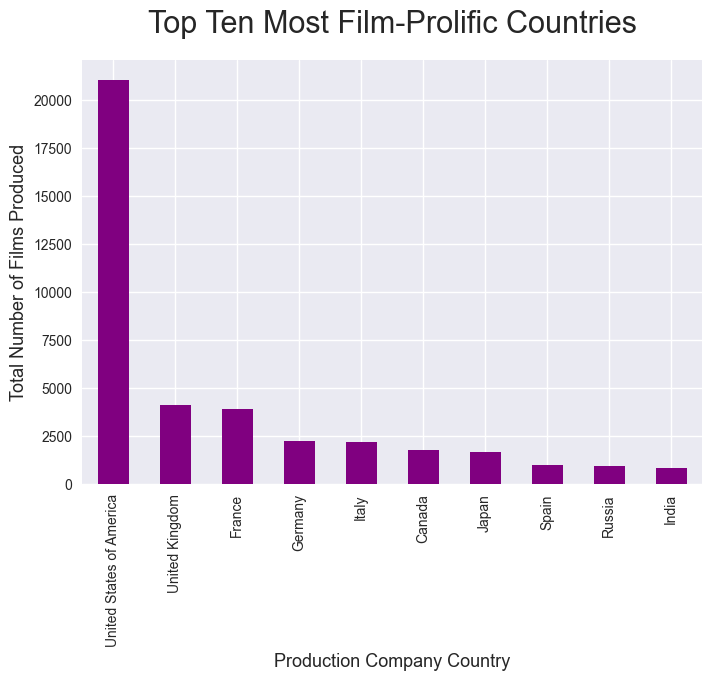

In [61]:
top_ten_countries = production_countries.production_country.value_counts().head(10)
top_ten_countries.plot(kind = 'bar', color = 'purple');
plt.title('Top Ten Most Film-Prolific Countries', fontsize = 22, pad = 20)
plt.ylabel('Total Number of Films Produced', fontsize = 13)
plt.xlabel('Production Company Country', fontsize = 13);

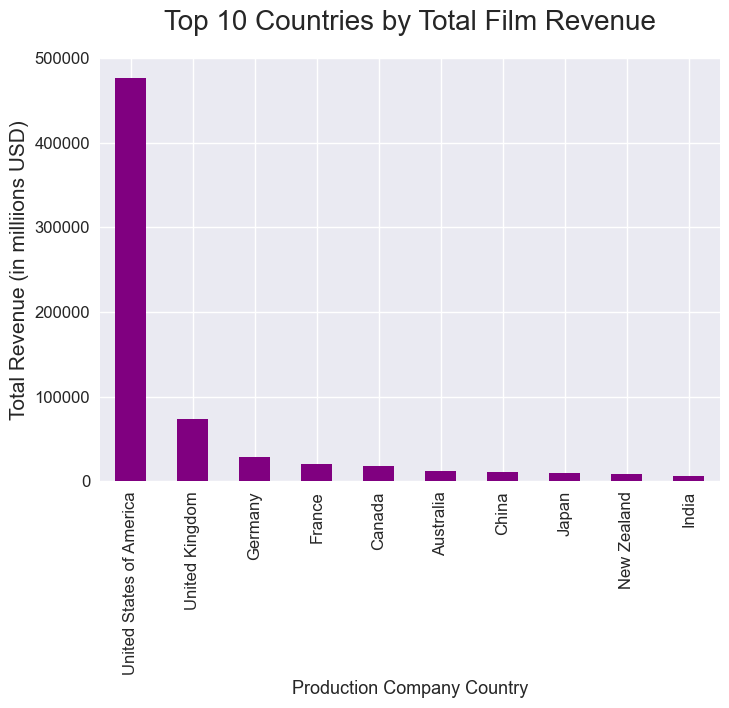

In [116]:
countries_agg.Total_Revenue.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Countries by Total Film Revenue", size = 20, pad = 20);
plt.ylabel('Total Revenue (in milliions USD)', fontsize = 15);
plt.xlabel('');
plt.xlabel('Production Company Country', fontsize = 13);

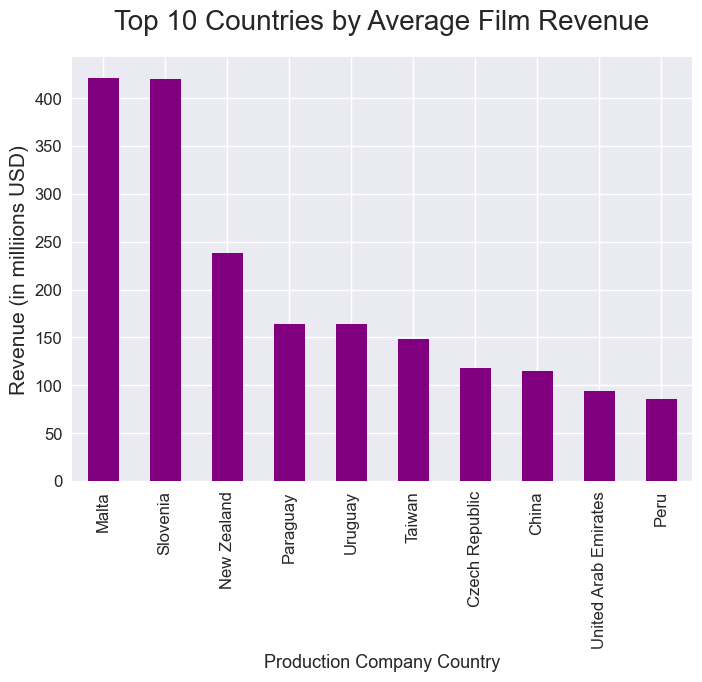

In [66]:
countries_agg.Mean_Revenue.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Countries by Average Film Revenue", size = 20, pad = 20);
plt.ylabel('Revenue (in milliions USD)', fontsize = 15);
plt.xlabel('');
plt.xlabel('Production Company Country', fontsize = 13);

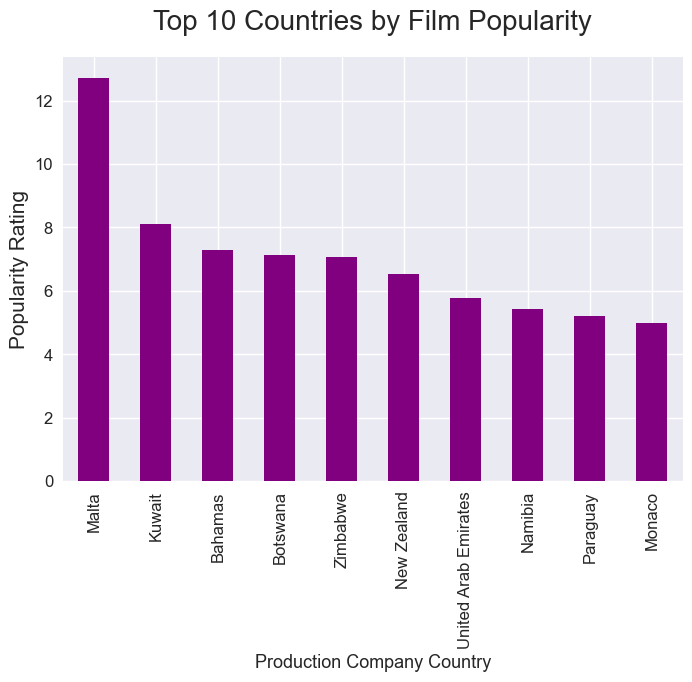

In [107]:
countries_agg.Mean_Popularity.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Countries by Film Popularity", size = 20, pad = 20);
plt.ylabel('Popularity Rating', fontsize = 15);
plt.xlabel('Production Company Country', fontsize = 13);

<a id=’language’></a>

---

## ➣ Overview of Film Success Based on Original Language:

In [18]:
# Extracting the top ten languages from the original database
top_languages = dict(movies.language.value_counts().head(10))
top_languages

{'en': 31755,
 'fr': 2400,
 'it': 1471,
 'ja': 1339,
 'de': 1064,
 'es': 976,
 'ru': 812,
 'hi': 501,
 'ko': 442,
 'zh': 406}

In [19]:
# Dictionary for converting language codes to languages
top_languages = {
 'en': 'English',
 'fr': 'French',
 'it': 'Italian',
 'ja': 'Japanese',
 'de': 'German',
 'es': 'Spanish',
 'ru': 'Russian',
 'hi': 'Hindi',
 'ko': 'Korean',
 'zh': 'Chinese'}

In [24]:
# Function to decode and replace the language codes with actual langugaes
def decode_languages(df, language_col, languages_list):
    df[language_col] = df[language_col].apply(lambda x: languages_list[x])
    return df

In [26]:
# Function to extract movies from the original database if their 
# original language is in the top 10 languages

def filter_by_language(df, language_col, top_languages):
    return df[df[language_col].isin(top_languages.keys())]

top_language_movies = filter_by_language(movies, 'language', top_languages).copy()
top_language_movies = decode_languages(top_language_movies, 'language', top_languages)

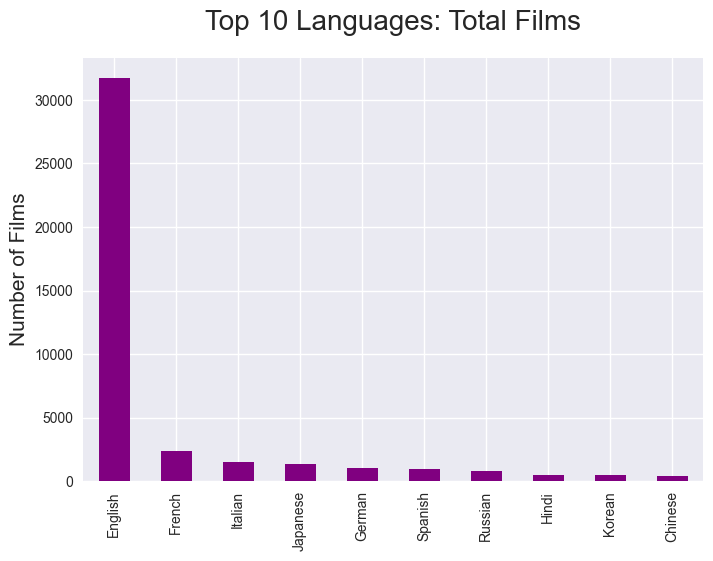

In [51]:
top_language_movies.language.value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'purple');
plt.title("Top 10 Languages: Total Films", size = 20, pad = 20);
plt.ylabel('Number of Films', fontsize = 15);
plt.xlabel('');

In [43]:
top_languages_agg = top_language_movies.groupby('language').agg(Total_Revenue = ('revenue', 'sum'),
                                                                Mean_Revenue = ('revenue', 'mean'),
                                                                Mean_Budget = ('budget', 'mean'),
                                                                Average_Vote_Counts = ('votes', 'mean'),
                                                                Mean_Rating = ('average_rating', 'mean'),
                                                                Mean_Popularity = ('popularity', 'mean'),
                                                                Average_Investment_Return = ('investment_return', 'mean'))

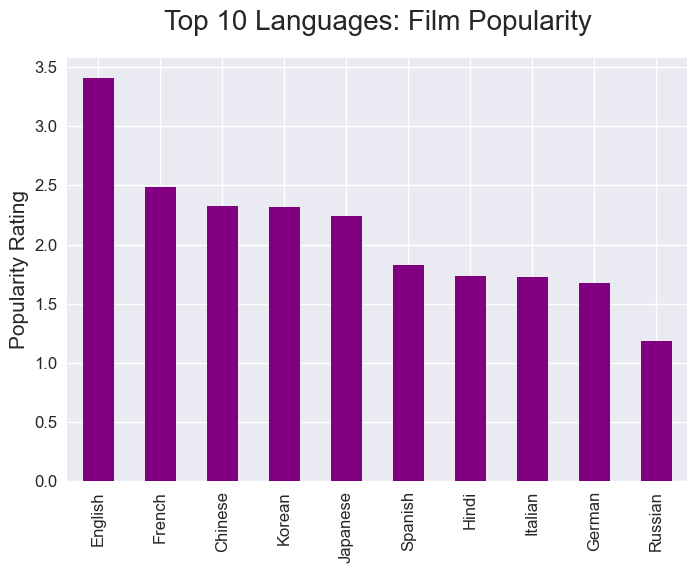

In [50]:
top_languages_agg.Mean_Popularity.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: Film Popularity", size = 20, pad = 20);
plt.ylabel('Popularity Rating', fontsize = 15);
plt.xlabel('');

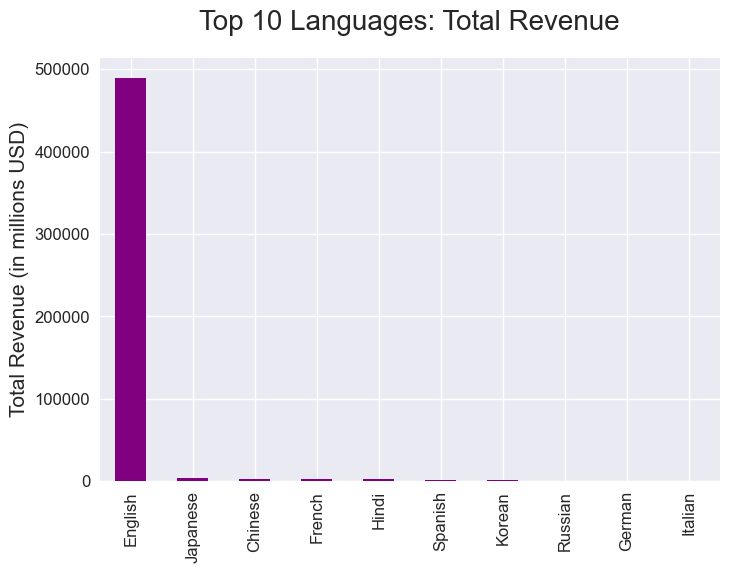

In [49]:
top_languages_agg.Total_Revenue.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: Total Revenue", size = 20, pad = 20);
plt.ylabel('Total Revenue (in millions USD)', fontsize = 15);
plt.xlabel('');

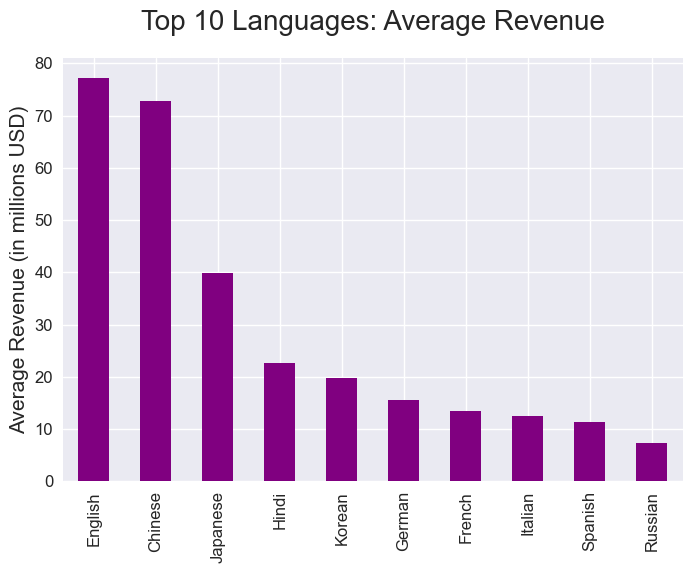

In [48]:
top_languages_agg.Mean_Revenue.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: Average Revenue", size = 20, pad = 20);
plt.ylabel('Average Revenue (in millions USD)', fontsize = 15);
plt.xlabel('');

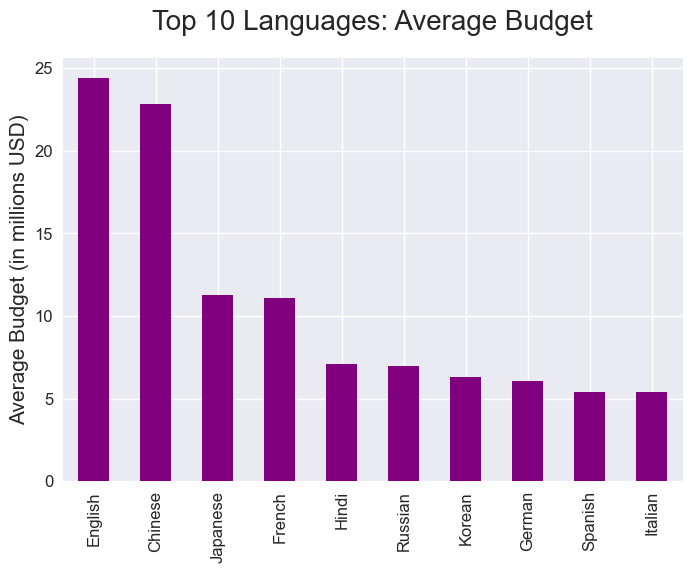

In [47]:
top_languages_agg.Mean_Budget.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: Average Budget", size = 20, pad = 20);
plt.ylabel('Average Budget (in millions USD)', fontsize = 15);
plt.xlabel('');

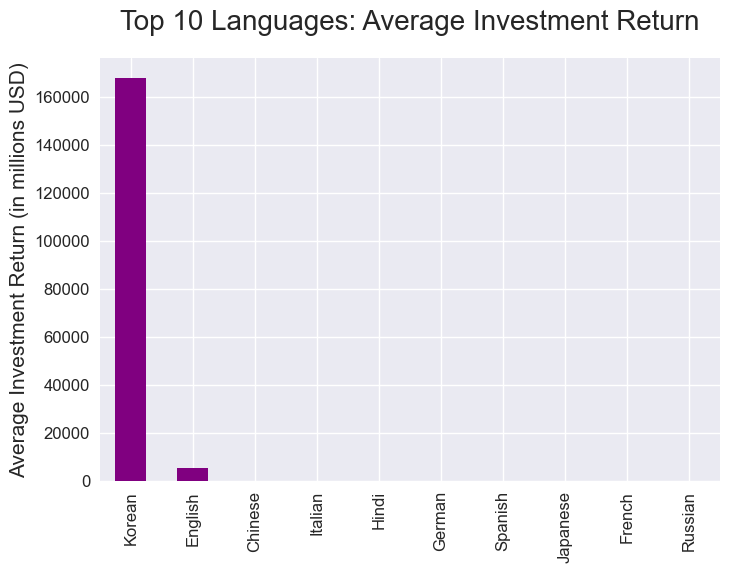

In [52]:
top_languages_agg.Average_Investment_Return.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: Average Investment Return", size = 20, pad = 20);
plt.ylabel('Average Investment Return (in millions USD)', fontsize = 15);
plt.xlabel('');

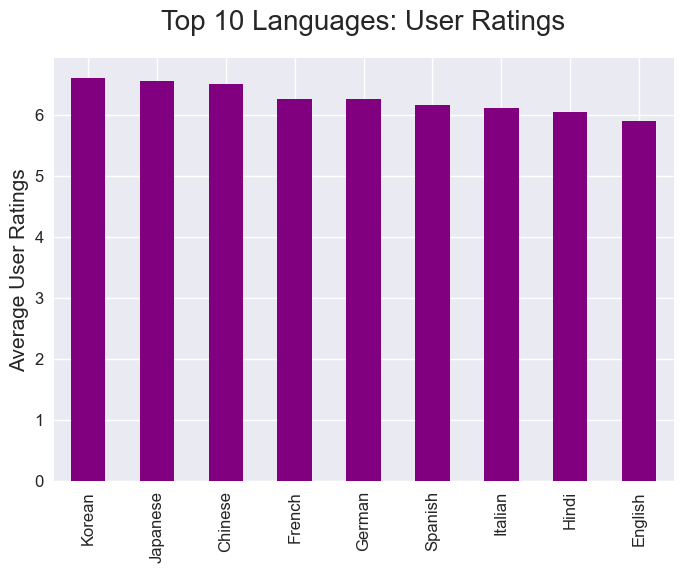

In [53]:
top_languages_agg[top_languages_agg.Average_Vote_Counts >= 20].Mean_Rating.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', fontsize = 12, color = 'purple');
plt.title("Top 10 Languages: User Ratings", size = 20, pad = 20);
plt.ylabel('Average User Ratings', fontsize = 15);
plt.xlabel('');

<a id=’runtime’></a>

---

## ➣ Correlation Between Success and Popularity and a Film's Runtime:

In [31]:
# Creating categories for movie lengths

def categorize_runtime(df, runtime_col):
    # create a new runtime_category column
    # use the runtime_categories dictionary to categorize the runtimes
    # if film is less than 45 minutes, it is very_short
    # if film is between 45 and 110 minutes, it is short
    # if film is between 110 and 250 minutes, it is long
    # if film is greater than 250 minutes, it is very_long
    df['runtime_category'] = df[runtime_col].apply(lambda x: 'very_short' if x < 45 
                                                   else 'short' if x < 80 
                                                   else 'average' if x < 120
                                                   else 'long' if x < 250
                                                   else 'very_long')
    return df

In [32]:
movies = categorize_runtime(movies, 'runtime', )

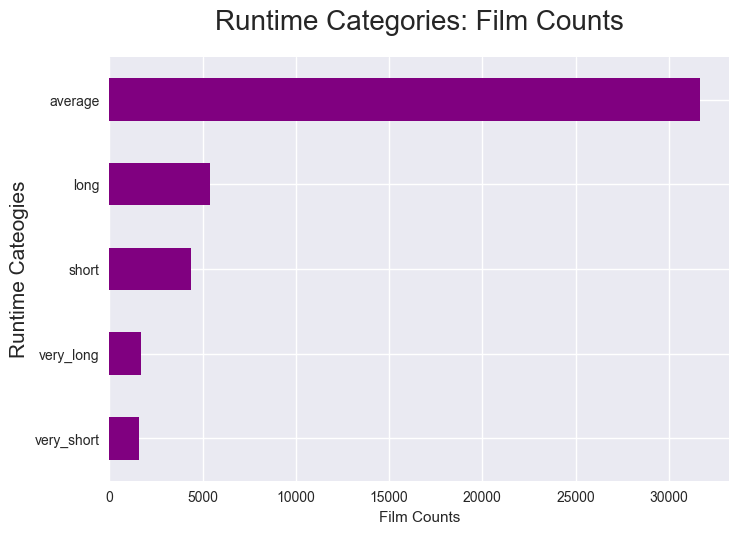

In [54]:
movies.runtime_category.value_counts().sort_values().plot(kind = 'barh', color = 'purple');
plt.title("Runtime Categories: Film Counts", size = 20, pad = 20);
plt.ylabel('Runtime Cateogies', fontsize = 15);
plt.xlabel('Film Counts');

In [39]:
runtime_agg = movies.groupby('runtime_category').agg(Total_Revenue = ('revenue', 'sum'),
                                                                Mean_Budget = ('budget', 'mean'),
                                                                Mean_Revenue = ('revenue', 'mean'),
                                                                Average_Vote_Counts = ('votes', 'mean'),
                                                                Mean_Rating = ('average_rating', 'mean'),
                                                                Mean_Popularity = ('popularity', 'mean'),
                                                                Average_Investment_Return = ('investment_return', 'mean'))

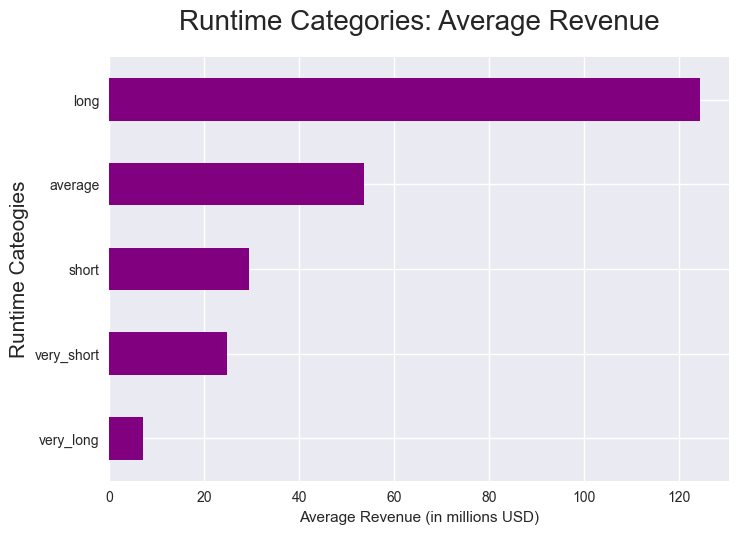

In [55]:
runtime_agg.Mean_Revenue.sort_values().plot(kind = 'barh', color = 'purple');
plt.title("Runtime Categories: Average Revenue", size = 20, pad = 20);
plt.ylabel('Runtime Cateogies', fontsize = 15);
plt.xlabel('Average Revenue (in millions USD)');

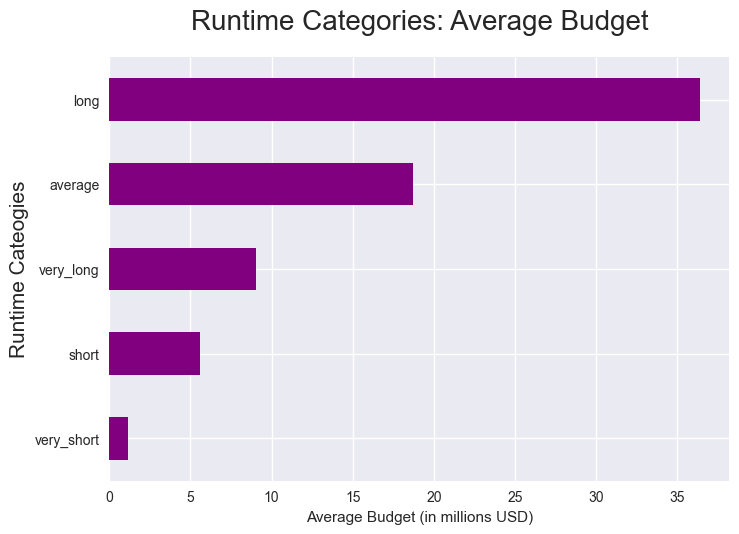

In [56]:
runtime_agg.Mean_Budget.sort_values().plot(kind = 'barh', color = 'purple');
plt.title("Runtime Categories: Average Budget", size = 20, pad = 20);
plt.ylabel('Runtime Cateogies', fontsize = 15);
plt.xlabel('Average Budget (in millions USD)');

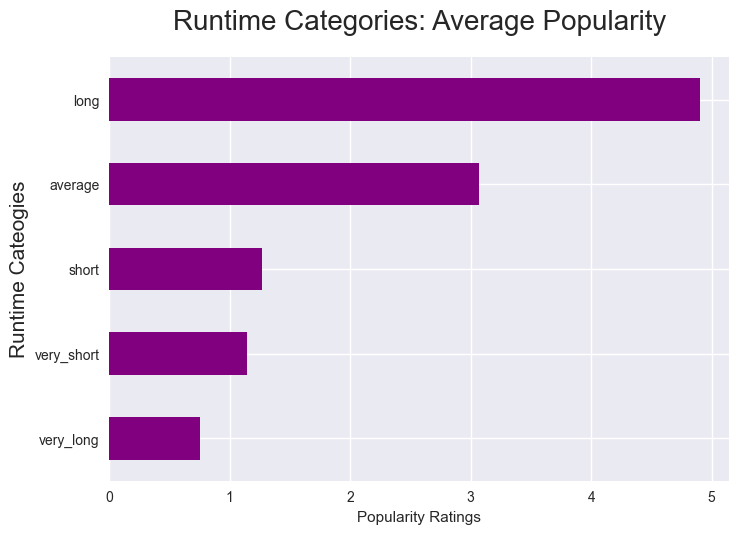

In [67]:
runtime_agg.Mean_Popularity.sort_values().plot(kind = 'barh', color = 'purple');
plt.title("Runtime Categories: Average Popularity", size = 20, pad = 20);
plt.ylabel('Runtime Cateogies', fontsize = 15);
plt.xlabel('Popularity Ratings');